In [ ]:
#Run in Xception environment
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
import os
import glob
import plotly
import plotly.express as ex
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
# Preprocessing the data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
#from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input


from tensorflow.keras.optimizers import Adam, SGD
from keras.models import Model,load_model
from tensorflow.keras.layers import Dense, Dropout,Conv2D,Flatten,MaxPooling2D
from keras import backend as K
#from tensorflow.keras.layers.experimental import preprocessing
#import visualkeras
from keras.utils import plot_model
# from keras_tuner.tuners import GridSearch
# from keras_tuner import HyperModel
# from keras_tuner.tuners import Hyperband

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


In [ ]:
## Images are of different sizes fixing the size to 64 x 64
im_size = 64
BATCH_SIZE = 32
NUM_CLASSES = 5 ## since there are 2 distinct classes

In [ ]:
# Define Training and Validation Data Generator with Augmentations
gen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.4,
    zoom_range=0.4
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Flow the data into the Data Generator
Train_gen = gen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Explainability_CNN/Train",
    target_size=(im_size, im_size),
    color_mode='grayscale',  # Ensure images are loaded in grayscale mode
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)
Test_gen = gen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Explainability_CNN/Test",
    target_size=(im_size, im_size),
    color_mode='grayscale',  # Ensure images are loaded in grayscale mode
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

Val_gen = gen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Explainability_CNN/Validate",
    target_size=(im_size, im_size),
    color_mode='grayscale',  # Ensure images are loaded in grayscale mode
    batch_size=1,
    shuffle = False,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

Found 1750 images belonging to 5 classes.
Found 375 images belonging to 5 classes.
Found 375 images belonging to 5 classes.


In [ ]:
Train_gen.class_indices

{'Greenflag': 0, 'Greenround': 1, 'Others': 2, 'Redflag': 3, 'Redround': 4}

## Basic Model (Updated with optimised parameters)

In [ ]:
INPUT_SHAPE = (64, 64, 1)
NUM_CLASSES = 5

model = keras.Sequential()
model.add(
    Conv2D(
        filters=32,
        kernel_size=3,
        activation='relu',
        input_shape=INPUT_SHAPE
    )
)
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.1))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.4))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(rate=0.45))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
# Compile model
#Learning rate adjusted from optimisation
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001113421743399749),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Only use for optimisation
### disable with esc +r / enable with esc+y

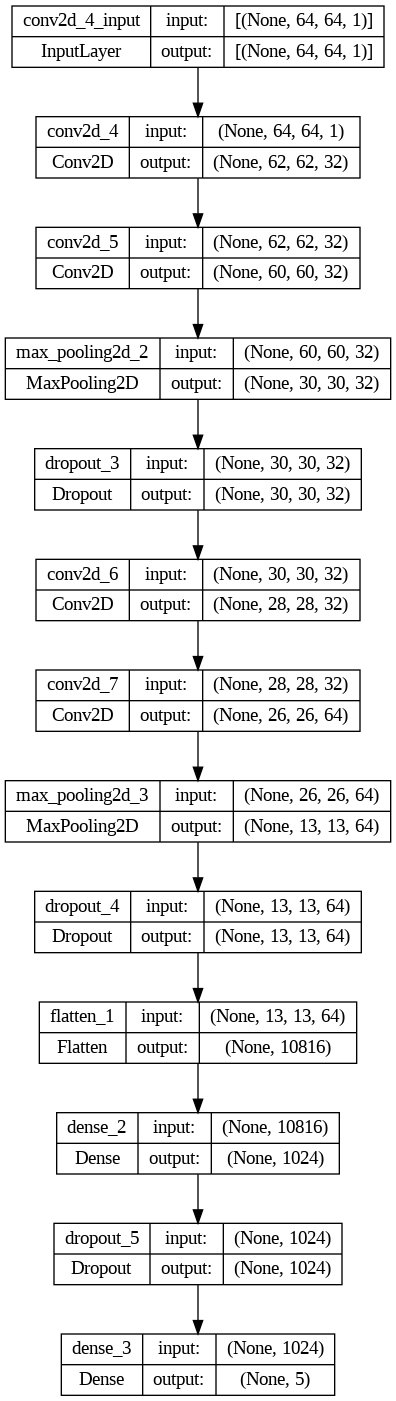

In [ ]:
## Activate to get an overview
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


# Continue here after model was optimised
### Check that optimal parameters were added

In [ ]:
# ## Training
# hist = model.fit(
#     Train_gen,
#     epochs=200,
#     validation_data=Test_gen
# )


In [ ]:
# # Save the model,
# model.save("/content/drive/MyDrive/Colab Notebooks/Explainability_CNN/best_model2.keras")

In [ ]:
# # Access the history dictionary
# history_dict = hist.history

# # Print all keys to see what metrics are available
# print(history_dict.keys())

# # Access training accuracy, assuming it's recorded under 'accuracy'
# # If your output does not include 'accuracy', it might be listed as 'acc' or you need to make sure it's being tracked
# train_acc = history_dict['accuracy']

# # Access the final epoch's accuracy (last value)
# final_train_accuracy = train_acc[-1]
# print(f"Final Training Accuracy: {final_train_accuracy:.4f}")


In [ ]:
# #Get true labels
# true_labels = Val_gen.classes

# #Load model
# model = load_model("/content/drive/MyDrive/Colab Notebooks/Explainability_CNN/best_model2.keras")


In [ ]:
# # Generate predictions for the entire validation set
# Val_gen.reset()  # Resetting the generator to ensure the order of predictions matches the labels
# predictions = model.predict(Val_gen, steps=len(Val_gen))

# # Convert predictions to class indices
# predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
# # Get true labels
# true_labels = Val_gen.classes

# # Compute the confusion matrix
# cm = confusion_matrix(true_labels, predicted_classes)

# cm_percentage = cm / np.sum(cm, axis=1)[:, np.newaxis]  # Convert to percentages


# # Assuming 'cm' is your confusion matrix and 'Val_gen' is your data generator with class indices
# fig, ax = plt.subplots(figsize=(10, 8))  # Adjust size as needed
# sns.heatmap(cm, annot=False, fmt="d", cmap="viridis",
#             xticklabels=sorted(Val_gen.class_indices, key=Val_gen.class_indices.get),
#             yticklabels=sorted(Val_gen.class_indices, key=Val_gen.class_indices.get), ax=ax)

# # Annotate each cell with the numeric value using matplotlib
# # "+ 0.5" is required to make sure the values are centered
# for i in range(cm.shape[0]):
#     for j in range(cm.shape[1]):
#         color = "black" if i == j else "#FCE625"  # Yellow color for off-diagonal, black for diagonal
#         ax.text(j + 0.5, i + 0.5, format(cm_percentage[i, j] * 100, '.1f'),
#                 ha="center", va="center", color=color, fontsize=14)

# # Increase tick label size
# ax.tick_params(axis='both', which='major', labelsize=14)

# plt.ylabel('True Label',fontsize=14)
# plt.xlabel('Predicted Label',fontsize=14)
# plt.show()

# # Save the plot to a file
# ax.figure.savefig('CNN_confusion.png', bbox_inches='tight')

In [ ]:
# # Calculate validation accuracy
# val_accuracy = accuracy_score(true_labels, predicted_classes)
# print(f"Validation Accuracy: {val_accuracy:.4f}")

In [ ]:
# # Display model structure

# # Generate a plot of the model
# plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

# # Optionally display the image in the notebook
# from IPython.display import Image
# Image(filename='model_structure.png')

## SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.1 MB/s eta 0:00:00


In [ ]:
import json

import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

import shap


# load pre-trained model and data
#model = ResNet50(weights="imagenet")
model = load_model("/content/drive/MyDrive/Colab Notebooks/Explainability_CNN/best_model2.keras")
X, y = next(Test_gen)
print(X.shape)
print(y.shape)
y_cat = np.argmax(y, axis=1)
print(y_cat)
print(y_cat.shape)
class_names = [keys for (keys, values) in Test_gen.class_indices.items()]

(32, 64, 64, 1)
(32, 5)
[4 4 1 0 4 0 4 3 1 1 4 0 0 2 3 1 3 1 4 3 2 3 2 3 0 4 1 3 2 1 4 1]
(32,)


In [24]:
# python function to get model output; replace this function with your own model function.
def f(x):
    predictions = model.predict(x, steps=len(x))
    # print(predictions)
    #predicted_classes = np.argmax(predictions, axis=1)
    #K.constant(predicted_classes)
    predicted_classes = tf.convert_to_tensor(predictions, dtype=tf.float32)
    return predicted_classes

# define a masker that is used to mask out partitions of the input image.
masker = shap.maskers.Image("inpaint_telea", X[0].shape)
masker_blur = shap.maskers.Image("blur(128,128)", X[0].shape)


# create an explainer with model and image masker
explainer = shap.Explainer(f, masker_blur, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(
    X[:], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:])

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:   3%|▎         | 1/32 [00:00<?, ?it/s]

50/50 [==============================] - 0s 3ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:   9%|▉         | 3/32 [00:50<06:23, 13.22s/it]

50/50 [==============================] - 0s 3ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  12%|█▎        | 4/32 [01:14<08:19, 17.84s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  16%|█▌        | 5/32 [01:40<09:22, 20.82s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  19%|█▉        | 6/32 [02:04<09:37, 22.21s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  22%|██▏       | 7/32 [02:27<09:21, 22.46s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  25%|██▌       | 8/32 [02:53<09:23, 23.46s/it]

50/50 [==============================] - 0s 3ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  28%|██▊       | 9/32 [03:18<09:12, 24.02s/it]

50/50 [==============================] - 0s 3ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  31%|███▏      | 10/32 [03:45<09:04, 24.77s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  34%|███▍      | 11/32 [04:09<08:39, 24.72s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 5ms/step


PartitionExplainer explainer:  38%|███▊      | 12/32 [04:34<08:12, 24.63s/it]

50/50 [==============================] - 0s 3ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 4ms/step


PartitionExplainer explainer:  41%|████      | 13/32 [04:59<07:52, 24.85s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  44%|████▍     | 14/32 [05:23<07:24, 24.68s/it]

50/50 [==============================] - 0s 3ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  47%|████▋     | 15/32 [05:49<07:04, 24.99s/it]

50/50 [==============================] - 0s 3ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  50%|█████     | 16/32 [06:14<06:38, 24.92s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  53%|█████▎    | 17/32 [06:40<06:18, 25.23s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  56%|█████▋    | 18/32 [07:05<05:53, 25.27s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  59%|█████▉    | 19/32 [07:28<05:20, 24.65s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  62%|██████▎   | 20/32 [08:00<05:21, 26.80s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  66%|██████▌   | 21/32 [08:26<04:50, 26.39s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  69%|██████▉   | 22/32 [08:53<04:27, 26.74s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 4ms/step


PartitionExplainer explainer:  72%|███████▏  | 23/32 [09:18<03:55, 26.16s/it]

50/50 [==============================] - 0s 3ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  75%|███████▌  | 24/32 [09:46<03:34, 26.86s/it]

50/50 [==============================] - 0s 4ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  78%|███████▊  | 25/32 [10:13<03:07, 26.72s/it]

50/50 [==============================] - 0s 3ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  81%|████████▏ | 26/32 [10:41<02:42, 27.06s/it]

50/50 [==============================] - 0s 4ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  84%|████████▍ | 27/32 [11:07<02:14, 26.89s/it]

50/50 [==============================] - 0s 3ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  88%|████████▊ | 28/32 [11:33<01:46, 26.64s/it]

50/50 [==============================] - 0s 3ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  91%|█████████ | 29/32 [12:02<01:21, 27.30s/it]

50/50 [==============================] - 0s 3ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  94%|█████████▍| 30/32 [12:29<00:54, 27.07s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer:  97%|█████████▋| 31/32 [12:57<00:27, 27.36s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 3ms/step


PartitionExplainer explainer: 100%|██████████| 32/32 [13:23<00:00, 26.98s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 4ms/step


PartitionExplainer explainer: 33it [13:52, 26.02s/it]


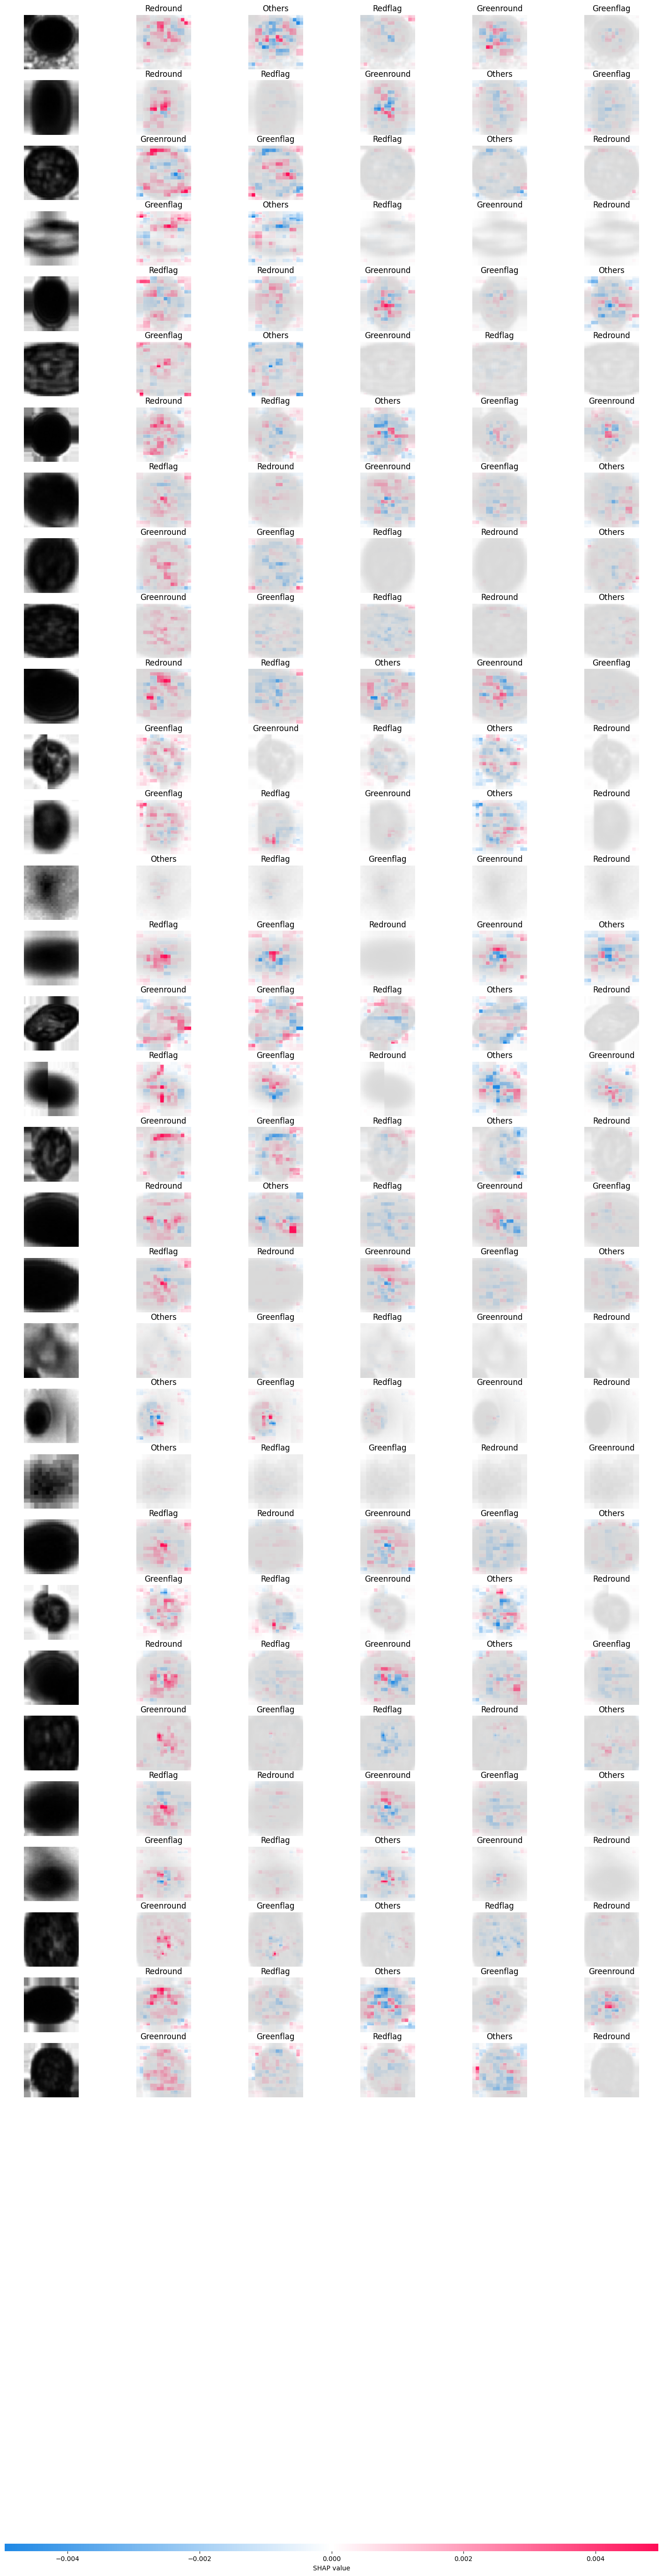

[4 4 1 0 4 0 4 3 1 1 4 0 0 2 3 1 3 1 4 3 2 3 2 3 0 4 1 3 2 1 4 1]
{'Greenflag': 0, 'Greenround': 1, 'Others': 2, 'Redflag': 3, 'Redround': 4}


In [25]:
# output with shap values
shap.image_plot(shap_values)

print(y_cat[:])
print(Train_gen.class_indices)



50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:   3%|▎         | 1/32 [00:00<?, ?it/s]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:   9%|▉         | 3/32 [00:35<04:15,  8.81s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  12%|█▎        | 4/32 [00:53<05:51, 12.55s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  16%|█▌        | 5/32 [01:10<06:29, 14.42s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  19%|█▉        | 6/32 [01:28<06:42, 15.50s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  22%|██▏       | 7/32 [01:45<06:46, 16.25s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  25%|██▌       | 8/32 [02:03<06:40, 16.68s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  28%|██▊       | 9/32 [02:21<06:30, 16.97s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  31%|███▏      | 10/32 [02:38<06:17, 17.18s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  34%|███▍      | 11/32 [02:56<06:03, 17.33s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  38%|███▊      | 12/32 [03:13<05:47, 17.39s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  41%|████      | 13/32 [03:31<05:31, 17.42s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  44%|████▍     | 14/32 [03:50<05:23, 17.98s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  47%|████▋     | 15/32 [04:08<05:06, 18.04s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  50%|█████     | 16/32 [04:26<04:47, 17.99s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  53%|█████▎    | 17/32 [04:44<04:29, 17.94s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  56%|█████▋    | 18/32 [05:02<04:10, 17.92s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  59%|█████▉    | 19/32 [05:20<03:52, 17.89s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  62%|██████▎   | 20/32 [05:38<03:34, 17.87s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  66%|██████▌   | 21/32 [05:55<03:16, 17.83s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  69%|██████▉   | 22/32 [06:13<02:58, 17.88s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  72%|███████▏  | 23/32 [06:31<02:40, 17.86s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  75%|███████▌  | 24/32 [06:49<02:23, 17.89s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  78%|███████▊  | 25/32 [07:08<02:06, 18.14s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  81%|████████▏ | 26/32 [07:26<01:49, 18.28s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  84%|████████▍ | 27/32 [07:45<01:31, 18.27s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  88%|████████▊ | 28/32 [08:03<01:12, 18.25s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  91%|█████████ | 29/32 [08:21<00:54, 18.15s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  94%|█████████▍| 30/32 [08:39<00:36, 18.11s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer:  97%|█████████▋| 31/32 [08:57<00:18, 18.03s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer: 100%|██████████| 32/32 [09:15<00:00, 18.00s/it]

50/50 [==============================] - 0s 2ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

6/6 [==============================] - 0s 2ms/step


PartitionExplainer explainer: 33it [09:32, 17.90s/it]


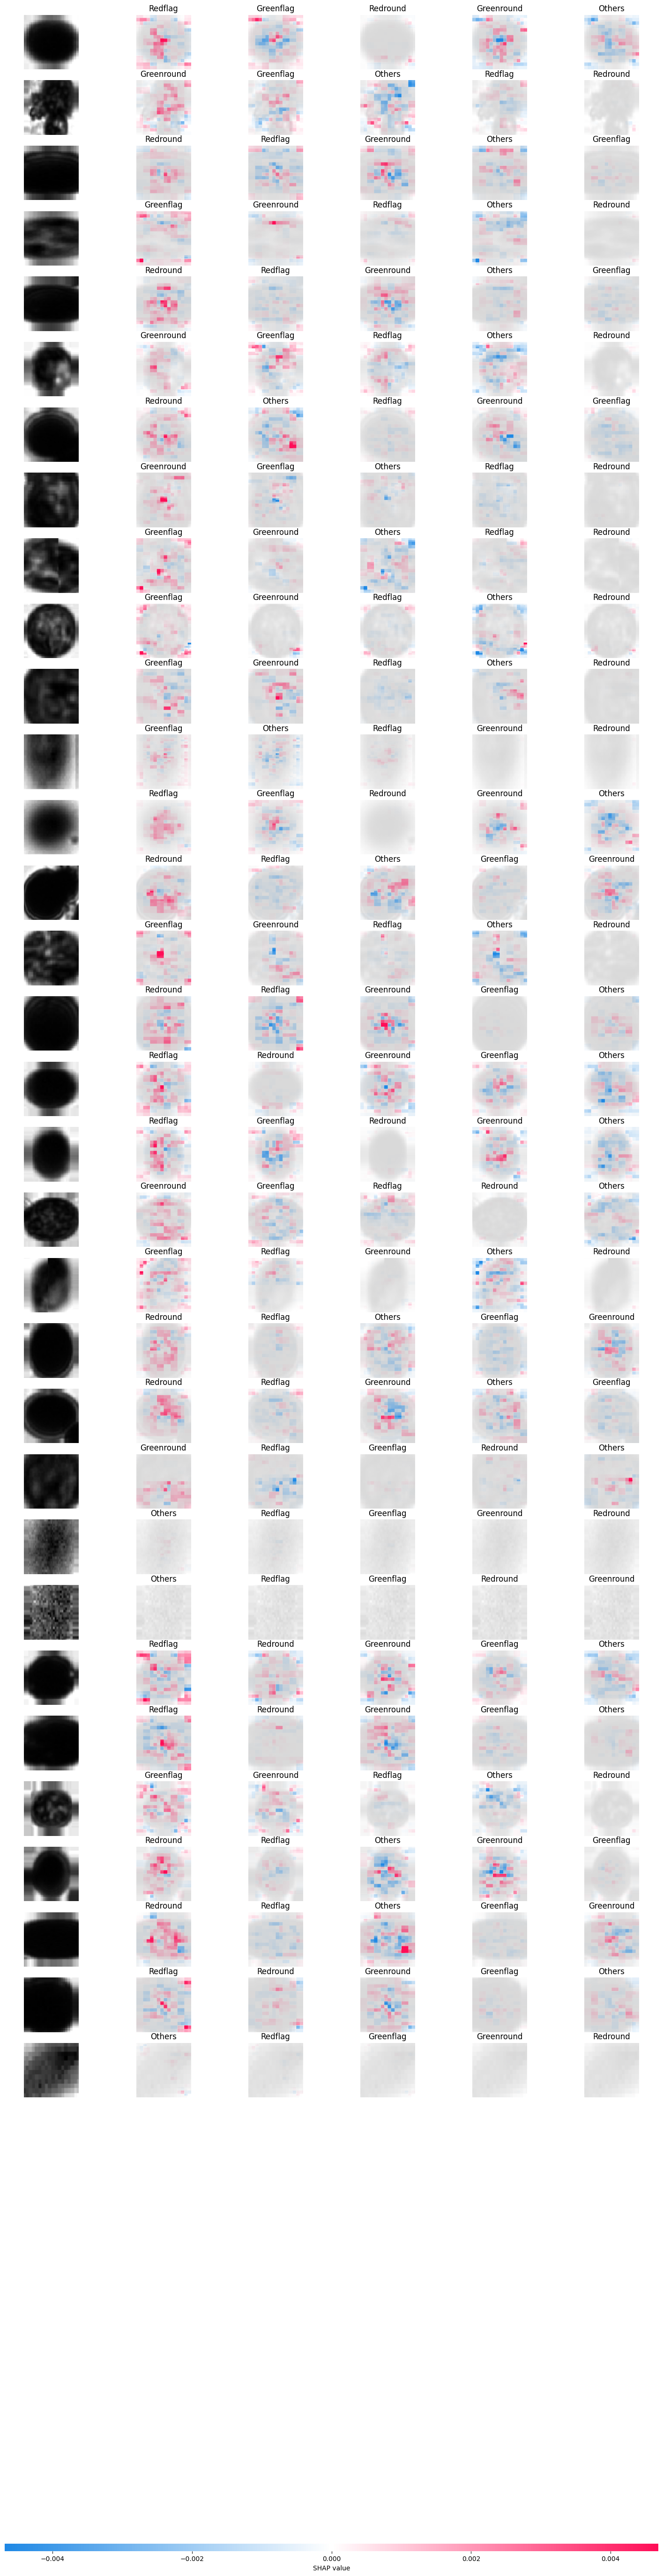

[3 1 4 0 4 1 4 1 0 0 1 0 3 4 0 4 3 3 1 0 4 4 1 2 2 3 3 1 4 4 3 2]
{'Greenflag': 0, 'Greenround': 1, 'Others': 2, 'Redflag': 3, 'Redround': 4}


In [ ]:
X_batch, y_batch = Test_gen[0]
y_cat_batch = np.argmax(y_batch, axis=1)

shap_values_batch = explainer(
    X_batch[:], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:])

shap.image_plot(shap_values_batch)
print(y_cat_batch[:])
print(Train_gen.class_indices)

In [ ]:
# !pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
